In [1]:
%load_ext nb_black

ModuleNotFoundError: No module named 'IPython.core.inputtransformer2'

In [2]:
import cv2
import numpy as np
import pandas as pd
import numba
import scipy.signal
import malko_fly as mf
import matplotlib
from scipy.optimize import curve_fit

matplotlib.rcParams.update({"font.size": 6})
mf.pb.cMapNotSym = mf.pb.plt.cm.viridis_r
mf.pb.cMapSym = mf.pb.plt.cm.PuOr_r

ModuleNotFoundError: No module named 'swarm'

In [3]:
nPosts = 2
dVal = 0.8  # distance cutoff to filter trajectories that end too far from the posts
symmetric = False

dataDIR = "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/data/flydata/"
dbDIR = "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/dbGen/"

folders = [
    ""
]  # ['multi_post_sleep_fast', 'multi_post_sleep_med', 'multi_post_fast', 'multi_post_slow']

<IPython.core.display.Javascript object>

In [4]:
class MalkoFly:
    def __init__(self, dataDIR, projectDB, expDB, nPosts, dVal):
        self.dataDIR = dataDIR
        self.projectDB = projectDB
        self.expDB = expDB
        self.nPosts = nPosts
        self.dVal = dVal

    def __call__(self):
        df, fetched, angles = self.preprocessData()
        # df = self.distanceFilter(df)
        return df, self.getArchitechture(df, fetched, angles)

    def preprocessData(self):
        return mf.preprocess_fly_data(
            self.dataDIR, self.projectDB, self.expDB, self.nPosts
        )

    def distanceFilter(self, df):
        return mf.distance_filter_trajectories(self.dVal, self.nPosts, df)

    def getArchitechture(self, df, fetched, angles):
        return mf.get_malko_architecture(
            self.projectDB, self.expDB, self.nPosts, df, fetched, angles
        )

<IPython.core.display.Javascript object>

In [5]:
all_experiments = mf.swarm.Swarm()
for i in range(0, len(folders)):
    projectDB = dbDIR + folders[i] + "/flyProjects.db"
    expDB = dbDIR + folders[i] + "/flyExperiments.db"

    malkofly = MalkoFly(dataDIR, projectDB, expDB, nPosts, dVal)
    df, massive_experiment = malkofly()
    all_experiments.addFish(massive_experiment)

fetched : [('7b035fd1-bf5d-4b17-b07b-fdce31c00174',), ('0cac2ffa-751c-47e2-a60c-a4394f0c3694',), ('730e9871-40e2-49f2-951e-64ee4c6a264b',), ('14aa360d-a93c-4c1c-bfa4-fe3d46fea4fe',), ('ae62bd32-c787-4ace-af5e-5602fd41c6de',), ('7b78ebae-f5d9-45b1-8a06-64ef4ac1be26',), ('32b3e6c4-0254-4a34-a89f-b4511f867a43',), ('be8d0ed4-cb4d-4be1-9197-ed3070a2d6c0',), ('02729761-34f5-47d3-853d-24d44b95e01a',), ('e5009561-0dc8-45a3-80d9-e23619ae9f63',), ('766cebfa-ec3a-45ae-bee8-c45b9af7e890',), ('811f4e3f-e84a-44fa-9aa2-c4cc5452b6b1',), ('b3122f45-b25b-49ab-994f-de87d61cd420',), ('38940006-4529-46a0-a368-e732cd684c29',), ('e02e2fb4-c50e-4d72-bd5e-f64e24bd718c',), ('4bc09102-9e80-4b75-9162-bfe947b89847',), ('4c934967-64bd-421e-9f00-cc017df1d6cd',), ('a7df1714-2578-469d-afc2-712db8adeac0',), ('d8794167-49af-44a7-8ade-cbe6dafcd718',), ('85e8dae9-3b21-42bb-8d27-b57d411cb94c',), ('eb518d61-f816-488f-98d0-400a5d6778b6',), ('a9ffea1b-5e11-4026-ae8c-3b6e13d52619',), ('33993c50-c962-4e8f-8142-ae85cb2079b1',), 

/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:313: RuntimeWarning: invalid value encountered in true_divide
  v1 = v1 / (np.linalg.norm(v1, axis=1))[:, None]
/mnt/ssd1/Documents/Vivek/MalkoFish/MalkoAnalyzer/BaseToolbox.py:314: RuntimeWarning: invalid value encountered in true_divide
  v2 = v2 / (np.linalg.norm(v2, axis=1))[:, None]


<IPython.core.display.Javascript object>

findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans.


 -- Architecture --


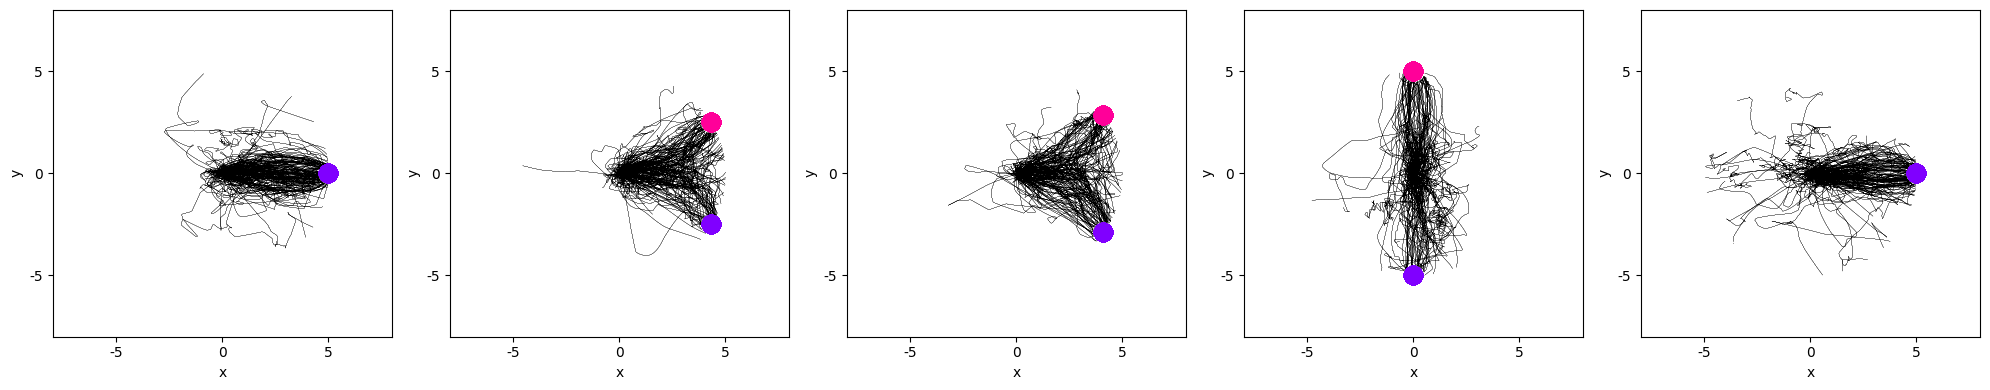

<IPython.core.display.Javascript object>

In [6]:
xTab = 5
yTab = len(folders)
fig = []
for y in range(0, yTab):
    for x in range(0, xTab):
        k = xTab * y + (x + 1)
        fig, ax = mf.pb.plot(
            all_experiments.get((y, x)).metaFish["x"][:, 0],
            all_experiments.get((y, x)).metaFish["x"][:, 1],
            fig=fig,
            xTab=xTab,
            yTab=yTab,
            kTab=k,
            xlim=(-8, 8),
            ylim=(-8, 8),
            figSize=(4 * xTab, 4 * yTab),
            markers=True,
            markerSize=1,
            alpha=0.01,
        )
        fig, ax = mf.pb.plot(
            all_experiments.get((y, x, 0, 0, 1)).var["x"][:, 0],
            all_experiments.get((y, x, 0, 0, 1)).var["x"][:, 1],
            fig=fig,
            xTab=xTab,
            yTab=yTab,
            kTab=k,
            ax=ax,
            ids=0,
            markers=True,
            markerSize=14,
            hold=True,
        )
        if x != 0 and x != xTab - 1:
            fig, ax = mf.pb.plot(
                all_experiments.get((y, x, 0, 0, 2)).var["x"][:, 0],
                all_experiments.get((y, x, 0, 0, 2)).var["x"][:, 1],
                fig=fig,
                xTab=xTab,
                yTab=yTab,
                kTab=k,
                ax=ax,
                ids=1,
                markers=True,
                markerSize=14,
                hold=True,
            )
            if nPosts == 3:
                fig, ax = mf.pb.plot(
                    all_experiments.get((y, x, 0, 0, 3)).var["x"][:, 0],
                    all_experiments.get((y, x, 0, 0, 3)).var["x"][:, 1],
                    fig=fig,
                    xTab=xTab,
                    yTab=yTab,
                    kTab=k,
                    ax=ax,
                    ids=2,
                    markers=True,
                    markerSize=14,
                    hold=True,
                )

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/trajectories_' + str(nPosts) + '.png', format='png', dpi=300)

findfont: Font family ['Glacial Indifference'] not found. Falling back to DejaVu Sans.


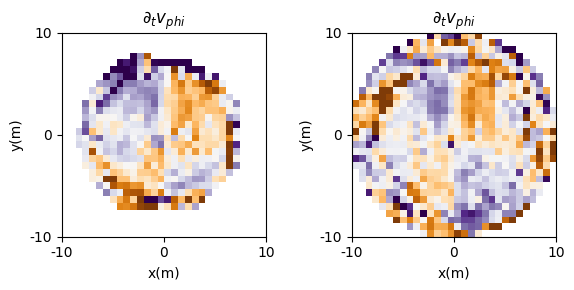

<IPython.core.display.Javascript object>

In [7]:
xTab = 2
yTab = len(folders)
plotK = 5
fig = []

fig = mf.plotter.FigureKatz(
    all_experiments.get((y, 0)).metaFish,
    all_experiments.get((y, 0)).metaFishRef,
    beats=False,
    lrPlot=False,
    fbPlot=False,
    rzPlot=False,
    noTitle=False,
    plotK=plotK,
    fig=fig,
    xTab=xTab,
    yTab=yTab,
    kTab=1,
)

fig = mf.plotter.FigureKatz(
    all_experiments.get((y, 4)).metaFish,
    all_experiments.get((y, 4)).metaFishRef,
    beats=False,
    lrPlot=False,
    fbPlot=False,
    rzPlot=False,
    noTitle=False,
    plotK=plotK,
    fig=fig,
    xTab=xTab,
    yTab=yTab,
    kTab=2,
)

# mf.pb.plt.savefig('/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/controls_' + str(nPosts) + '.png', format='png', dpi=300)

In [8]:
if nPosts == 2:
    i = 3 if symmetric == True else 1

    xs = all_experiments.get((0, i)).metaFish["x"][:, 0]
    ys = all_experiments.get((0, i)).metaFish["x"][:, 1]

    post0_x = np.unique(all_experiments.get((0, i, 0, 0, 1)).var["x"][:, 0])[0]
    post0_y = np.unique(all_experiments.get((0, i, 0, 0, 1)).var["x"][:, 1])[0]

    post1_x = np.unique(all_experiments.get((0, i, 0, 0, 2)).var["x"][:, 0])[0]
    post1_y = np.unique(all_experiments.get((0, i, 0, 0, 2)).var["x"][:, 1])[0]

    if symmetric == True:
        tx = xs
        xs = ys
        ys = tx

else:
    i = 3 if symmetric == True else 2

    xs = all_experiments.get((0, i)).metaFish["x"][:, 0]
    ys = all_experiments.get((0, i)).metaFish["x"][:, 1]

    post0_x = np.unique(all_experiments.get((0, i, 0, 0, 1)).var["x"][:, 0])[0]
    post0_y = np.unique(all_experiments.get((0, i, 0, 0, 1)).var["x"][:, 1])[0]

    post1_x = np.unique(all_experiments.get((0, i, 0, 0, 2)).var["x"][:, 0])[0]
    post1_y = np.unique(all_experiments.get((0, i, 0, 0, 2)).var["x"][:, 1])[0]

    post2_x = np.unique(all_experiments.get((0, i, 0, 0, 3)).var["x"][:, 0])[0]
    post2_y = np.unique(all_experiments.get((0, i, 0, 0, 3)).var["x"][:, 1])[0]

    if symmetric == True:
        xs = xs - post0_x
    else:
        xs = np.concatenate((xs, xs))
        ys = np.concatenate((ys, -ys))

<IPython.core.display.Javascript object>

In [9]:
nbins = 500
peak_threshold = 0.9


def density_map(x, y, stats=True):
    if nPosts == 2:
        val = 121 if symmetric == True else 201

        blur = (11, 11) if stats == True else (val, val)
        r = (
            [[post0_y, post1_y], [-5.0, 5.0]]
            if symmetric == True
            else [[0, post0_x], [post0_y, post1_y]]
        )
    else:
        val = 251 if symmetric == True else 101

        blur = (11, 11) if stats == True else (val, val)
        r = [[0, post1_x], [post0_y, post2_y]]
    h, xedge, yedge, image = mf.pb.plt.hist2d(x, y, bins=nbins, normed=True, range=r)

    if nPosts == 2:
        tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))
    else:
        tmp_img = np.flipud(np.rot90(cv2.GaussianBlur(h, blur, 0)))

    for i in range(0, nbins):
        max_val = np.max(tmp_img[:, i])
        tmp_img[:, i] = tmp_img[:, i] / max_val

    return tmp_img

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


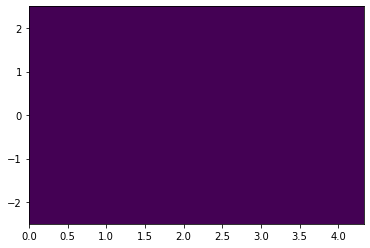

<IPython.core.display.Javascript object>

In [10]:
img = density_map(xs, ys, stats=False)

if nPosts == 2:
    x_peaks = np.where(img > peak_threshold)[1] * post0_x / nbins
    y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y
else:
    x_peaks = np.where(img > peak_threshold)[1] * post1_x / nbins
    y_peaks = np.where(img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y

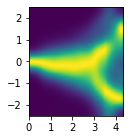

<IPython.core.display.Javascript object>

In [11]:
if nPosts == 2:
    if symmetric == True:
        fig, ax = mf.pb.plt.subplots(1, 1, figsize=(2, 2))
        mf.pb.plt.imshow(img ** 2, extent=[-5.0, 5.0, -5.0, 5.0])
    else:
        fig, ax = mf.pb.plt.subplots(1, 1, figsize=(post0_x / 2.5, post1_y / 1.25))
        mf.pb.plt.imshow(img ** 2, extent=[0, post0_x, post0_y, post1_y])
        mf.pb.plt.xticks([0, 1, 2, 3, 4])
else:
    if symmetric == True:
        fig, ax = mf.pb.plt.subplots(1, 1, figsize=(3.75 / 2, post2_y / 2))
        mf.pb.plt.imshow(img ** 2, extent=[post0_x, post1_x, post0_y, post2_y])
    else:
        fig, ax = mf.pb.plt.subplots(1, 1, figsize=(1.25, post2_x / 2))
        mf.pb.plt.imshow(img ** 2, extent=[0, post1_x, post0_y, post2_y])
        mf.pb.plt.xticks([0, 1, 2, 3, 4, 5])

if symmetric == True:
    mf.pb.plt.savefig(
        "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/"
        + str(nPosts)
        + "_post_symmetric_tracks.pdf",
        dpi=600,
        bbox_inches="tight",
    )
else:
    mf.pb.plt.savefig(
        "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/"
        + str(nPosts)
        + "_post_bifurcation_tracks.pdf",
        dpi=600,
        bbox_inches="tight",
    )

### Identify bifurcation point using a piecewise phase-transition function

#### Get first bifurcation point
Once you have this, you can draw a line segment bisecting the angle between the point and two targets. This will be the line about which you symmetrise to get the second bifurcation point

In [12]:
def fitfunc(x, p, q, r):
    return r * (np.abs((x - p)) ** q)


def fitfunc_vec_self(x, p, q, r):
    y = np.zeros(x.shape)
    for i in range(len(y)):
        y[i] = fitfunc(x[i], p, q, r)
    return y

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


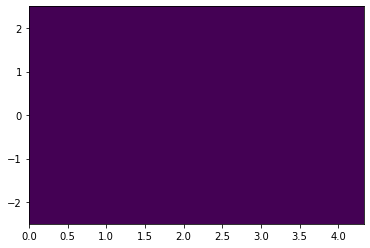

<IPython.core.display.Javascript object>

In [13]:
if nPosts == 2:
    bif_pt = 2.0
    params1 = [2.5, 1, 1]

    x_fit = []
    y_fit = []

    indices = np.random.choice(len(xs), size=1000, replace=True)
    x_sub = np.concatenate((xs, xs))
    y_sub = np.concatenate((ys, -ys))

    tmp_img = density_map(x_sub, y_sub, stats=True)
    x_fit = np.where(tmp_img > peak_threshold)[1] * post0_x / nbins
    y_fit = (
        np.where(tmp_img > peak_threshold)[0] * (post0_y - post1_y) / nbins + post1_y
    )

    x_fit = x_fit
    y_fit = np.abs(y_fit)
    y_fit = y_fit[x_fit > bif_pt]
    x_fit = x_fit[x_fit > bif_pt]

    for i in range(0, 10):
        fit_params, pcov = curve_fit(
            fitfunc_vec_self, x_fit, y_fit, p0=params1, maxfev=10000
        )
        params1 = fit_params

else:
    bif_pt = 1.0
    params1 = [1.5, 1, 1]

    xs1 = xs[np.where(xs < 3.0)[0]]
    ys1 = ys[np.where(xs < 3.0)[0]]

    x_fit = []
    y_fit = []

    x_sub = np.concatenate((xs1, xs1))
    y_sub = np.concatenate((ys1, -ys1))

    tmp_img = density_map(x_sub, y_sub, stats=True)
    x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
    y_fit = (
        np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y
    )

    x_fit = x_fit
    y_fit = np.abs(y_fit)
    y_fit = y_fit[x_fit > bif_pt]
    x_fit = x_fit[x_fit > bif_pt]

    for i in range(0, 10):
        fit_params, pcov = curve_fit(
            fitfunc_vec_self, x_fit, y_fit, p0=params1, maxfev=10000
        )
        params1 = fit_params

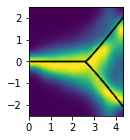

<IPython.core.display.Javascript object>

In [14]:
if nPosts == 2:
    fig, ax = mf.pb.plt.subplots(1, 1, figsize=(post0_x / 2.5, post1_y / 1.25))
    mf.pb.plt.imshow(img ** 2, extent=[0, post0_x, post0_y, post1_y])
else:
    mf.pb.plt.imshow(img ** 2, extent=[0, post1_x, post0_y, post2_y])

parameters = params1
step_len = 0.01

x1 = np.arange(step_len, parameters[0], step_len)
y1 = np.zeros(len(x1))

x = (
    np.arange(parameters[0], post0_x - step_len, step_len)
    if nPosts == 2
    else np.arange(parameters[0], 3.2, step_len)
)
x2 = np.concatenate((x, x))
y2 = np.concatenate(
    (
        (parameters[2] * (x - parameters[0])) ** parameters[1],
        -(parameters[2] * (x - parameters[0])) ** parameters[1],
    )
)

if nPosts != 2:
    bisector_xs = [params1[0], post2_x]
    bisector_ys = [
        0,
        np.tan(np.arctan2(post2_y, post2_x - params1[0]) / 2) * (post2_x - params1[0]),
    ]

mf.pb.plt.scatter(x1, y1, c="black", s=0.1)
mf.pb.plt.scatter(x2, y2, c="black", s=0.1)
mf.pb.plt.xticks([0, 1, 2, 3, 4])

if nPosts == 2:
    fig.savefig(
        "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/"
        + str(nPosts)
        + "_post_bifurcation_quantified.pdf",
        dpi=600,
        bbox_inches="tight",
    )

In [15]:
if nPosts == 2:
    print(
        "The bifurcation occurs at an angle",
        2 * np.arctan2(post1_y, post1_x - params1[0]) * 180 / np.pi,
    )
else:
    print(
        "The first bifurcation occurs at an angle",
        2 * np.arctan2(post2_y, post2_x - params1[0]) * 180 / np.pi,
    )

The bifurcation occurs at an angle 109.542186804214


<IPython.core.display.Javascript object>

#### Get the second bifurcation point
For this, you must center the trajectories about the bifurcation point, get a new heatmap and rotate this by the angle of the bisector line

In [16]:
# center points about the first bifurcation
cxs = xs - params1[0]
cys = ys

cpost0_x = post0_x - params1[0]
cpost1_x = post1_x - params1[0]
cpost2_x = post2_x - params1[0]

<IPython.core.display.Javascript object>

In [17]:
@numba.njit(fastmath=True, parallel=True)
def parallel_rotate(xy, rmat):
    out = np.zeros(xy.shape)
    for idx in numba.prange(xy.shape[0]):
        out[idx] = np.dot(rmat[idx], xy[idx])
    return out

<IPython.core.display.Javascript object>

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


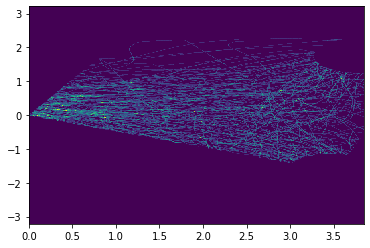

<IPython.core.display.Javascript object>

In [18]:
# clip all points to the left of and below 0 and points beyond post centers
ccxs = cxs[np.where(cxs > 0)[0]]
ccys = cys[np.where(cxs > 0)[0]]
ccxs = ccxs[np.where(ccys > 0)[0]]
ccys = ccys[np.where(ccys > 0)[0]]

xy = np.concatenate((ccxs.reshape(-1, 1), ccys.reshape(-1, 1)), axis=1)
angle = np.full(ccxs.shape, np.arctan2(post2_y, post2_x - params1[0]) / 2)
rmat = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]).T
rx, ry = parallel_rotate(xy, rmat).T

blur = (101, 101)

r1 = [[0, post1_x], [post0_y, post2_y]]
r2 = [[-params1[0], post1_x - params1[0]], [post0_y, post2_y]]
r3 = [[0, post1_x - params1[0]], [post0_y, post2_y]]

h1, xedge, yedge, image = mf.pb.plt.hist2d(xs, ys, bins=nbins, normed=True, range=r1)
h2, xedge, yedge, image = mf.pb.plt.hist2d(cxs, cys, bins=nbins, normed=True, range=r2)
h3, xedge, yedge, image = mf.pb.plt.hist2d(
    ccxs, ccys, bins=nbins, normed=True, range=r3
)
h4, xedge, yedge, image = mf.pb.plt.hist2d(rx, ry, bins=nbins, normed=True, range=r3)

tmp_img1 = np.flipud(np.rot90(cv2.GaussianBlur(h1, blur, 0)))
tmp_img2 = np.flipud(np.rot90(cv2.GaussianBlur(h2, blur, 0)))
tmp_img3 = np.flipud(np.rot90(cv2.GaussianBlur(h3, blur, 0)))
tmp_img4 = np.flipud(np.rot90(cv2.GaussianBlur(h4, blur, 0)))

for i in range(0, nbins):
    max_val = np.max(tmp_img1[:, i])
    tmp_img1[:, i] = tmp_img1[:, i] / max_val
    max_val = np.max(tmp_img2[:, i])
    tmp_img2[:, i] = tmp_img2[:, i] / max_val
    max_val = np.max(tmp_img3[:, i])
    tmp_img3[:, i] = tmp_img3[:, i] / max_val
    max_val = np.max(tmp_img4[:, i])
    tmp_img4[:, i] = tmp_img4[:, i] / max_val

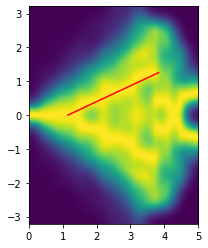

<IPython.core.display.Javascript object>

In [19]:
mf.pb.plt.imshow(tmp_img1, extent=[r1[0][0], r1[0][1], r1[1][0], r1[1][1]])
mf.pb.plt.plot(bisector_xs, bisector_ys, c="red")

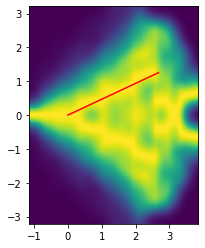

<IPython.core.display.Javascript object>

In [20]:
mf.pb.plt.imshow(tmp_img2, extent=[r2[0][0], r2[0][1], r2[1][0], r2[1][1]])
mf.pb.plt.plot(bisector_xs - params1[0], bisector_ys, c="red")

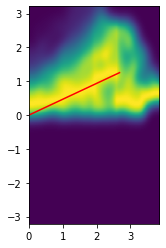

<IPython.core.display.Javascript object>

In [21]:
mf.pb.plt.imshow(np.flipud(tmp_img3), extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])
mf.pb.plt.plot(bisector_xs - params1[0], bisector_ys, c="red")

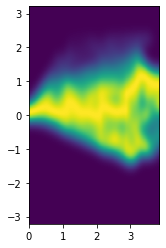

<IPython.core.display.Javascript object>

In [22]:
mf.pb.plt.imshow(np.flipud(tmp_img4), extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])

/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/home/user/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


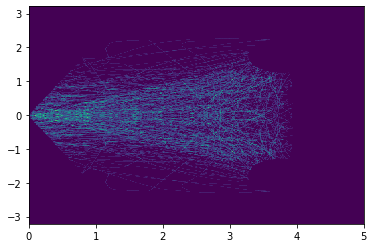

<IPython.core.display.Javascript object>

In [23]:
bif_pt = 1.8
params2 = [2.5, 0.5, 1]

x_fit = []
y_fit = []

x_sub = np.concatenate((rx, rx))
y_sub = np.concatenate((ry, -ry))

tmp_img = density_map(x_sub, y_sub, stats=True)
x_fit = np.where(tmp_img > peak_threshold)[1] * post1_x / nbins
y_fit = np.where(tmp_img > peak_threshold)[0] * (post0_y - post2_y) / nbins + post2_y

x_fit = x_fit
y_fit = np.abs(y_fit)
y_fit = y_fit[x_fit > bif_pt]
x_fit = x_fit[x_fit > bif_pt]

for i in range(0, 10):
    fit_params, pcov = curve_fit(
        fitfunc_vec_self, x_fit, y_fit, p0=params2, maxfev=10000
    )
    params2 = fit_params

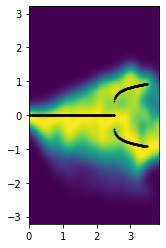

<IPython.core.display.Javascript object>

In [24]:
mf.pb.plt.imshow(tmp_img4, extent=[r3[0][0], r3[0][1], r3[1][0], r3[1][1]])

parameters = params2
step_len = 0.01

x1 = np.arange(step_len, parameters[0], step_len)
y1 = np.zeros(len(x1))

x = np.arange(parameters[0], 3.5, step_len)
x2 = np.concatenate((x, x))
y2 = np.concatenate(
    (
        (parameters[2] * (x - parameters[0])) ** parameters[1],
        -(parameters[2] * (x - parameters[0])) ** parameters[1],
    )
)

mf.pb.plt.scatter(x1, y1, c="black", s=1)
mf.pb.plt.scatter(x2, y2, c="black", s=1)

In [25]:
bif2 = np.array([params2[0], 0]).reshape(1, -1)
ang = angle[0]
rmat1 = np.array([[np.cos(ang), -np.sin(ang)], [np.sin(ang), np.cos(ang)]]).T
bif2 = parallel_rotate(bif2, rmat).T
bif2[0] += params1[0]

<IPython.core.display.Javascript object>

In [26]:
print(
    "The second bifurcation occurs at angle",
    (
        (
            np.arctan2(post2_y - bif2[1], post2_x - bif2[0])
            - np.arctan2(bif2[1] - post1_y, post1_x - bif2[0])
        )
        * 180
        / np.pi
    )[0],
)

The second bifurcation occurs at angle 118.38259535401819


<IPython.core.display.Javascript object>

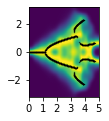

<IPython.core.display.Javascript object>

In [27]:
fig, ax = mf.pb.plt.subplots(1, 1, figsize=(1.25, post2_x / 2))
mf.pb.plt.imshow(img ** 2, extent=[0, post1_x, post0_y, post2_y])

parameters = params2
step_len = 0.01

x1 = np.arange(step_len, parameters[0], step_len)
y1 = np.zeros(len(x1))
bcxy1 = np.concatenate((x1.reshape(-1, 1), y1.reshape(-1, 1)), axis=1)
ang1 = np.full(x1.shape, -np.arctan2(post2_y, post2_x - params1[0]) / 2)
rmat1 = np.array([[np.cos(ang1), -np.sin(ang1)], [np.sin(ang1), np.cos(ang1)]]).T
bcx1, bcy1 = parallel_rotate(bcxy1, rmat1).T
bx1 = bcx1 + params1[0]

x = np.arange(parameters[0], 3.5, step_len)
x2 = np.concatenate((x, x))
y2 = np.concatenate(
    (
        (parameters[2] * (x - parameters[0])) ** parameters[1],
        -(parameters[2] * (x - parameters[0])) ** parameters[1],
    )
)
bcxy2 = np.concatenate((x2.reshape(-1, 1), y2.reshape(-1, 1)), axis=1)
ang2 = np.full(x2.shape, -np.arctan2(post2_y, post2_x - params1[0]) / 2)
rmat2 = np.array([[np.cos(ang2), -np.sin(ang2)], [np.sin(ang2), np.cos(ang2)]]).T
bcx2, bcy2 = parallel_rotate(bcxy2, rmat2).T
bx2 = bcx2 + params1[0]

bx2 = np.concatenate((bx2, bx2))
bcy2 = np.concatenate((bcy2, -bcy2))

mf.pb.plt.scatter(bx2, bcy2, c="black", s=0.1)

parameters = params1
step_len = 0.01

x1 = np.arange(5 * step_len, parameters[0], step_len)
y1 = np.zeros(len(x1))

x = np.arange(parameters[0], np.max(bx1), step_len)
x2 = np.concatenate((x, x))
y2 = np.concatenate(
    (
        (parameters[2] * (x - parameters[0])) ** parameters[1],
        -(parameters[2] * (x - parameters[0])) ** parameters[1],
    )
)

mf.pb.plt.scatter(x1, y1, c="black", s=0.1)
mf.pb.plt.scatter(x2, y2, c="black", s=0.1)
mf.pb.plt.xticks([0, 1, 2, 3, 4, 5])
mf.pb.plt.yticks([-2, 0, 2])

fig.savefig(
    "/mnt/ssd1/Documents/Vivek/flyVR/fly-matrix/figures/"
    + str(nPosts)
    + "_post_bifurcation_quantified.pdf",
    dpi=300,
    bbox_inches="tight",
)